# Analisis exploratorio de datos (EDA)

In [63]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [64]:
DATASET_PATH = '../data/yellow_tripdata_2020-02.parquet'

In [65]:
raw_df = pd.read_parquet(DATASET_PATH)

Visualizamos los primeros datos

Column wiki: 

- VendorID: taxi provider

- tpep_pickup_datetime: pick up time

- tpep_dropoff_datetime: drop off time

- passenger_count: number of passengers

- trip_distance: in miles

- RatecodeID: category of rate price

- store_and_fwd_flag: This flag indicates whether the trip record was held in vehicle
memory before sending to the vendor, aka “store and forward,”
because the vehicle did not have a connection to the server

- PULocationID: pick up zone

- DOLocationID: Drop Off zone

- payment_type: categorical type

- fare_amount: The time-and-distance fare calculated by the meter

- extra: Miscellaneous extras and surcharges. Currently, this only includes
the $0.50 and $1 rush hour and overnight charges

- mta_tax: $0.50 MTA tax that is automatically triggered based on the metered
rate in use

- Improvement_surcharge: $0.30 improvement surcharge assessed trips at the flag drop. The
improvement surcharge began being levied in 2015

- Tip_amount: Tip amount – This field is automatically populated for credit card
tips. Cash tips are not included.

- Tolls_amount: Total amount of all tolls paid in trip. 

- Total_amount: total price

- Congestion_Surcharge: Total amount collected in trip for NYS congestion surcharge

- airport_fee: $1.25 for pick up only at LaGuardia and John F. Kennedy Airports

In [66]:
raw_df['airport_fee'].unique()

array([nan])

In [67]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6299367 entries, 0 to 6299366
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

In [68]:
raw_df.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
count,6.299367e+06,6299367,6299367,6.250533e+06,6.299367e+06,6.250533e+06,6.299367e+06,6.299367e+06,6.299367e+06,6.299367e+06,6.299367e+06,6.299367e+06,6.299367e+06,6.299367e+06,6.299367e+06,6.299367e+06,6.250533e+06,0.0
mean,1.673616e+00,2020-02-15 17:07:47.789264896,2020-02-15 17:23:55.531851776,1.504449e+00,2.864533e+00,1.055871e+00,1.646020e+02,1.625341e+02,1.248365e+00,1.260736e+01,1.108678e+00,4.927634e-01,2.220724e+00,3.273723e-01,2.979165e-01,1.859116e+01,2.307304e+00,NaN
min,1.000000e+00,2008-12-31 22:20:23,2008-12-31 22:55:19,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-7.500000e+02,-1.769000e+01,-5.000000e-01,-9.300000e+01,-3.823000e+01,-3.000000e-01,-7.503000e+02,-2.500000e+00,NaN
25%,1.000000e+00,2020-02-08 04:46:57.500000,2020-02-08 05:18:01,1.000000e+00,9.600000e-01,1.000000e+00,1.250000e+02,1.130000e+02,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,1.130000e+01,2.500000e+00,NaN
50%,2.000000e+00,2020-02-15 07:17:55,2020-02-15 07:39:47,1.000000e+00,1.600000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,9.000000e+00,5.000000e-01,5.000000e-01,1.960000e+00,0.000000e+00,3.000000e-01,1.452000e+01,2.500000e+00,NaN
75%,2.000000e+00,2020-02-22 23:46:54,2020-02-23 00:02:15,2.000000e+00,2.900000e+00,1.000000e+00,2.330000e+02,2.340000e+02,1.000000e+00,1.400000e+01,2.500000e+00,5.000000e-01,2.950000e+00,0.000000e+00,3.000000e-01,2.015000e+01,2.500000e+00,NaN
max,6.000000e+00,2020-07-11 12:57:52,2020-07-11 12:59:24,9.000000e+00,5.705109e+04,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,6.052000e+03,9.006000e+01,3.951000e+01,5.490200e+02,9.255000e+02,3.000000e-01,6.061420e+03,2.750000e+00,NaN
std,4.692367e-01,NaN,NaN,1.144727e+00,4.027472e+01,7.769877e-01,6.554007e+01,6.977452e+01,4.793241e-01,1.189053e+01,1.255356e+00,7.366464e-02,2.665063e+00,1.675211e+00,3.452216e-02,1.445150e+01,6.903989e-01,NaN


In [69]:
## asumptions

NUMERICAL_FEATURES = ['passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',  'total_amount', 'congestion_surcharge']
CATEGORY_FEATURES = ['VendorID', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type', 'airport_fee']
TIME_FEATURES = ['tpep_pickup_datetime', 'tpep_dropoff_datetime']

TARGET = "..."

## Estadísticas descriptivas de variables numéricas

In [70]:
num_df = raw_df[NUMERICAL_FEATURES]

In [71]:
num_df.head()

,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2.60,11.0,0.5,0.5,2.45,0.0,0.3,14.75,0.0
1,1.0,4.80,21.5,3.0,0.5,6.30,0.0,0.3,31.60,2.5
2,1.0,3.20,11.0,3.0,0.5,1.00,0.0,0.3,15.80,2.5
3,1.0,4.38,18.0,0.5,0.5,3.00,0.0,0.3,24.80,2.5
4,1.0,2.28,9.5,0.5,0.5,0.00,0.0,0.3,10.80,0.0


In [72]:
num_df.shape

(6299367, 10)

In [73]:
# Calculate stats: 

# Mean:

print("### Mean: ")
print(num_df.mean())
print('\n')

# STD:

print("### Standard deviation: ")
print(num_df.std())
print('\n')

### Mean: 
passenger_count           1.504449
trip_distance             2.864533
fare_amount              12.607359
extra                     1.108678
mta_tax                   0.492763
tip_amount                2.220724
tolls_amount              0.327372
improvement_surcharge     0.297916
total_amount             18.591161
congestion_surcharge      2.307304
dtype: float64


### Standard deviation: 
passenger_count           1.144727
trip_distance            40.274719
fare_amount              11.890528
extra                     1.255356
mta_tax                   0.073665
tip_amount                2.665063
tolls_amount              1.675211
improvement_surcharge     0.034522
total_amount             14.451496
congestion_surcharge      0.690399
dtype: float64




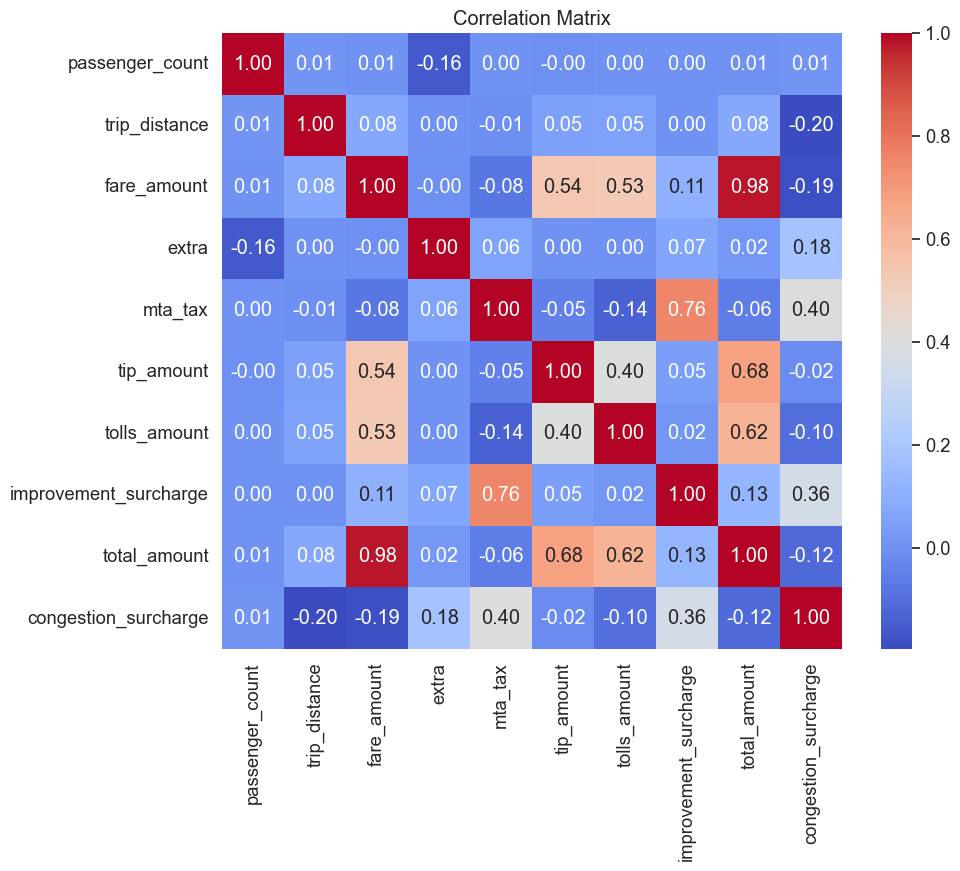

In [74]:
# CORRELATION MATRIX: 


corr_matrix = num_df.corr()

plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.set(font_scale=1.2)  # Adjust font size as needed
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

# Set the title
plt.title("Correlation Matrix")

# Show the plot
plt.show()


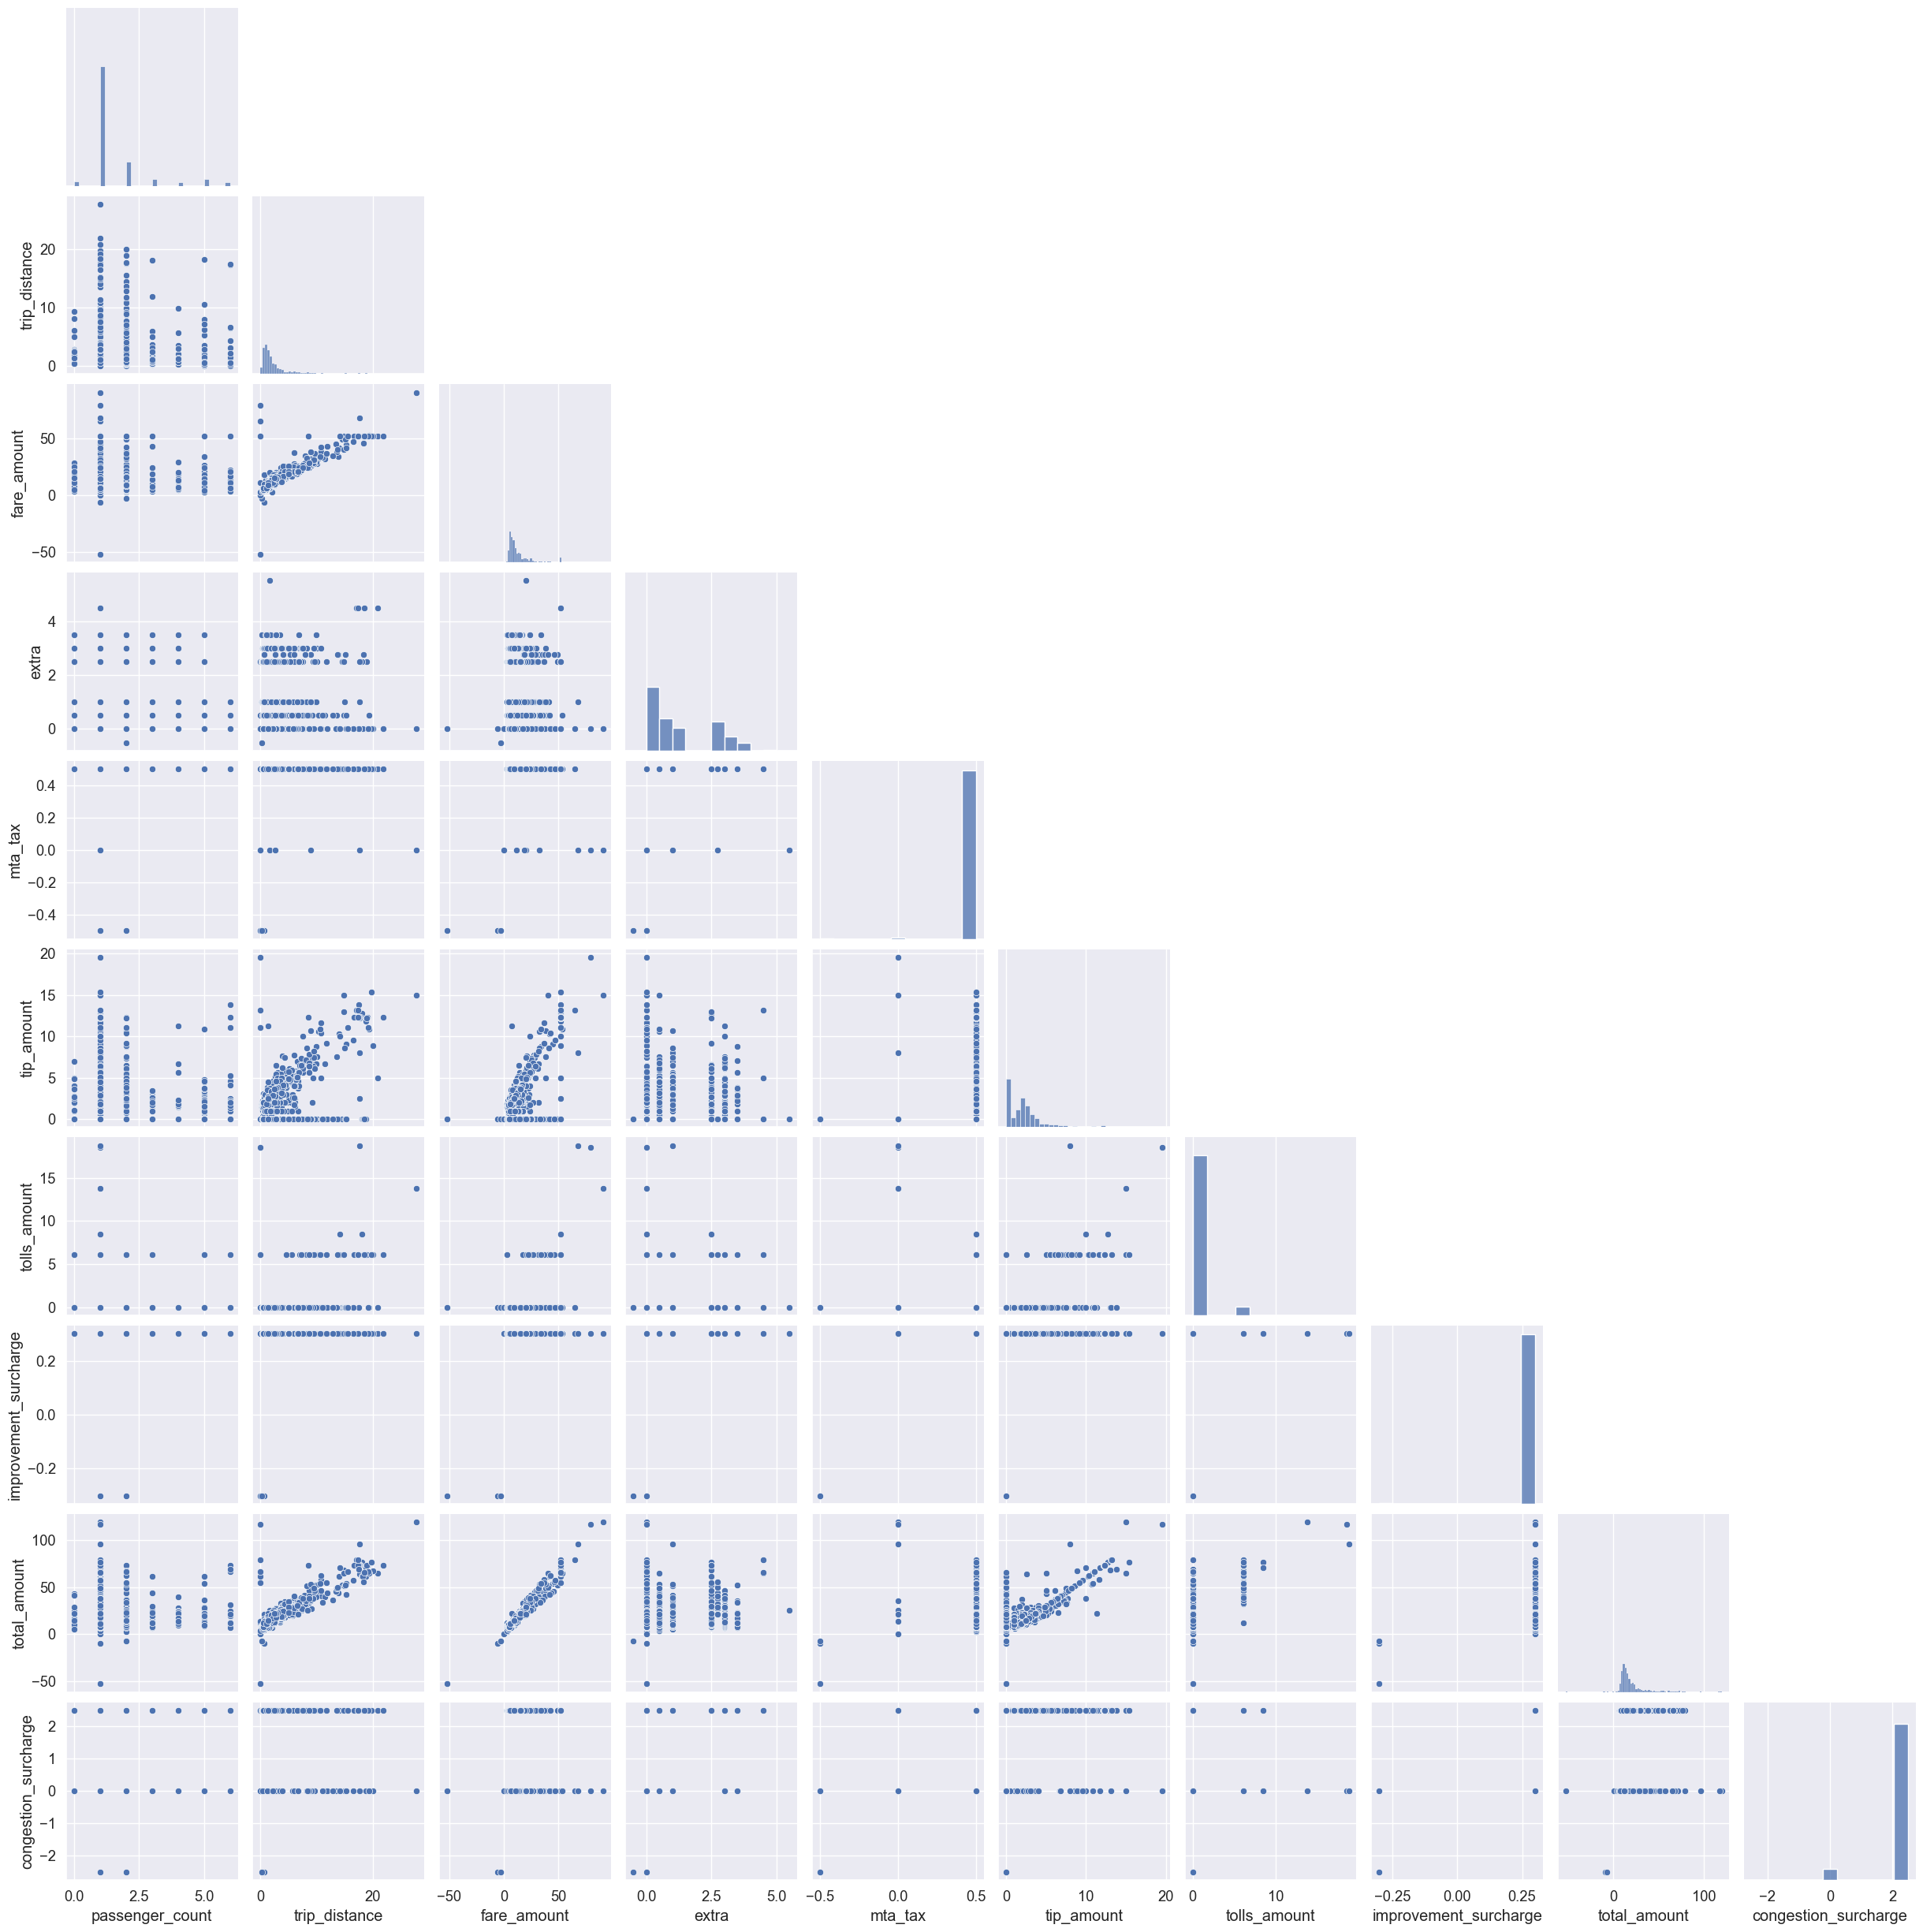

In [75]:
# Make a sample from the df to make pair plot

sampled_num_df = num_df.sample(n = 1000, random_state=42)

sns.pairplot(data=sampled_num_df, corner=True)

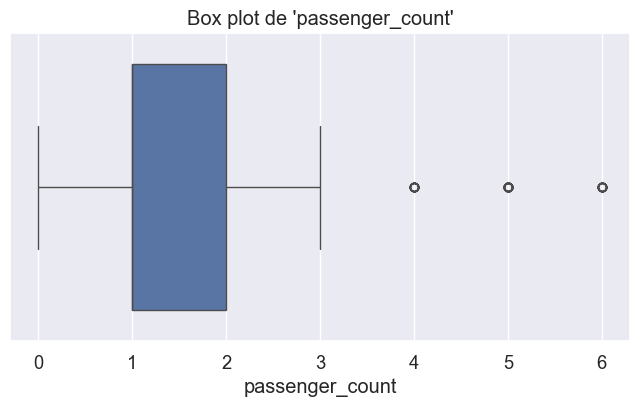

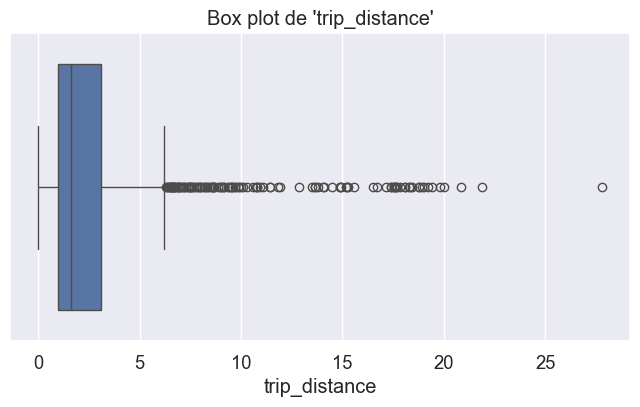

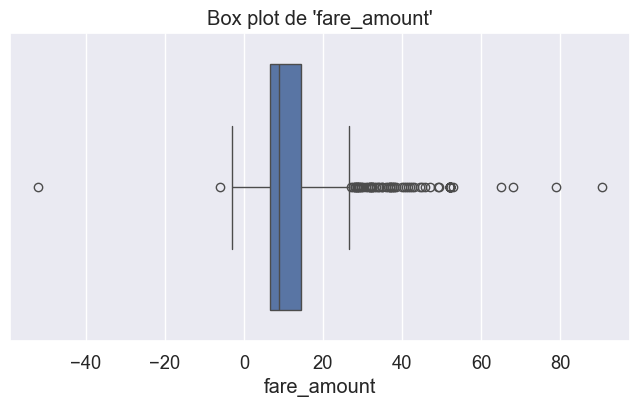

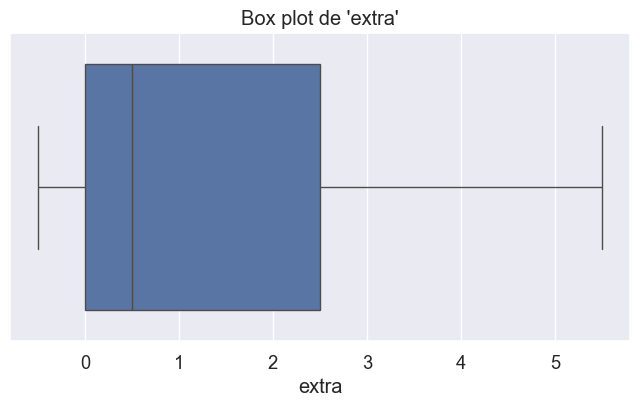

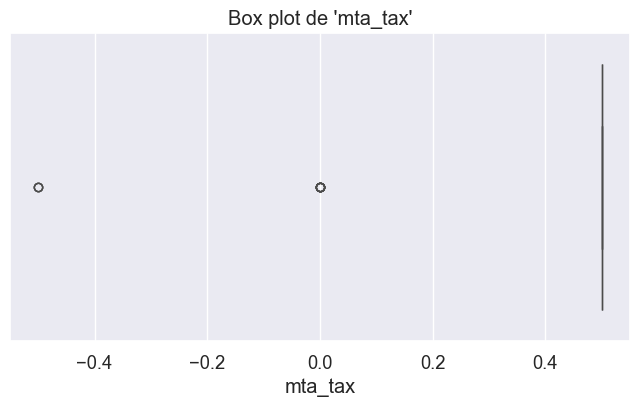

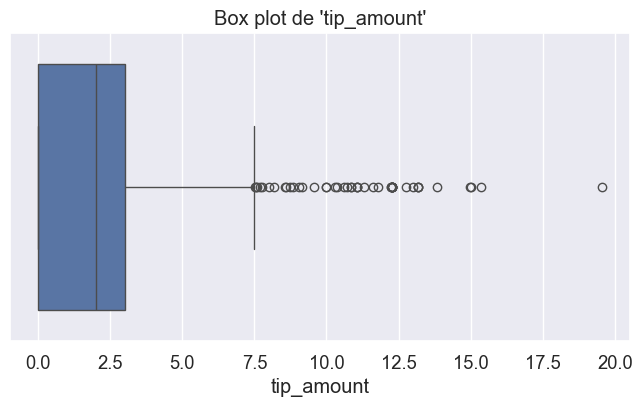

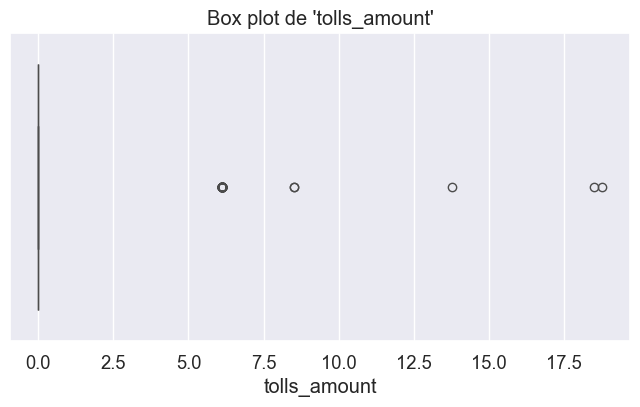

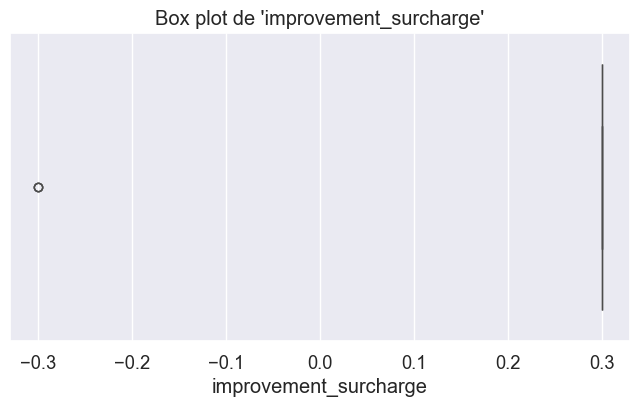

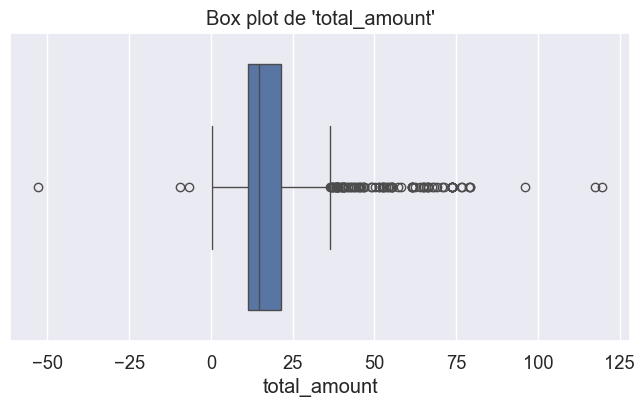

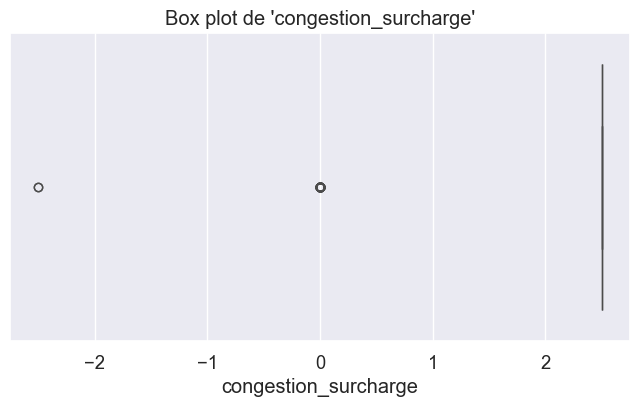

In [76]:
for column in sampled_num_df.columns:
    plt.figure(figsize=(8, 4))  # Ajusta el tamaño del gráfico según necesidad
    sns.boxplot(x=sampled_num_df[column])
    plt.title(f"Box plot de '{column}'")
    plt.show()

- passenger_count, es discreta, hay que hacer un grafico de barras
- trip_distance: al hacer el boxplot se ven muchos outliers. Revisar que pasa ahi.
- fare_amount: tiene valores negativos. Siendo que es la tarifa en relacion al tiempo y distancia no tiene sentido que sea negativa.
- extra: Tiene valores negativos. Al representar cargos adicionales y recargos varios no tiene sentido que tome valores negativos. (Puede ser que sean descuentos por algun motivo?)
- mta_tax: Representa el Metropolitan commuter transportation mobility tax. Toma valores negativos y outliers llamativos ($39) siendo que deberia ser de $0.50. No creo que aporte mucha informacion ya que pareciera ser un valor fijo que siempre se aplica.
- tolls_amount: Representa el monto total de peajes pagados en el viaje. al hacer un describe() se ve que el valor minimo es negativo. No tiene sentido. Tiene algunos outliers
- improvement_surcharge: es un cargo aplicado en la bajada de bandera. Tiene algun que otro valor negativo. Los demas estan entre 0 y 0.3
- total_amount: tiene algunos outliers negativos. y algunos outliers positivos interesantes.
- congestion_surcharge: Existen algunos valores negativos

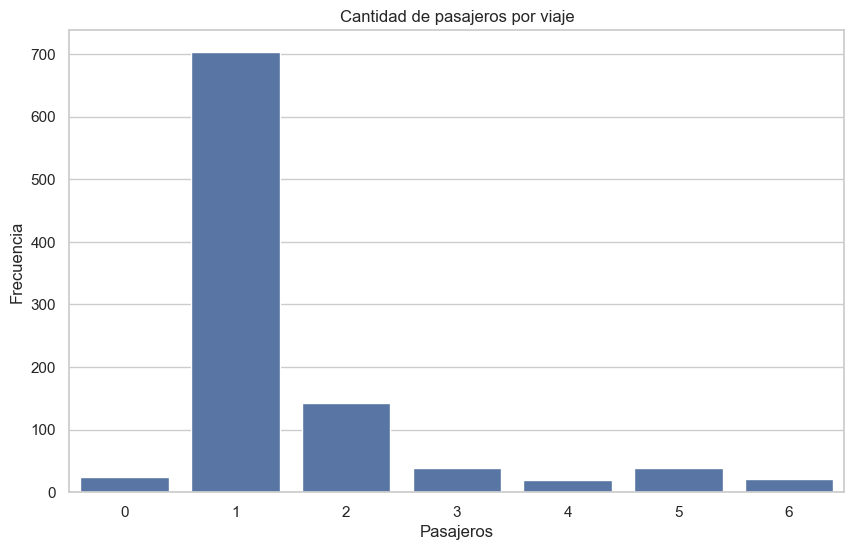

In [77]:
# Conteo de los valores en la columna
conteo_valores = sampled_num_df.passenger_count.value_counts()

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(x=conteo_valores.index.astype(int), y=conteo_valores.values)

plt.title('Cantidad de pasajeros por viaje')
plt.xlabel('Pasajeros')
plt.ylabel('Frecuencia')

plt.show()

## Estadísticas descriptivas de variables categóricas

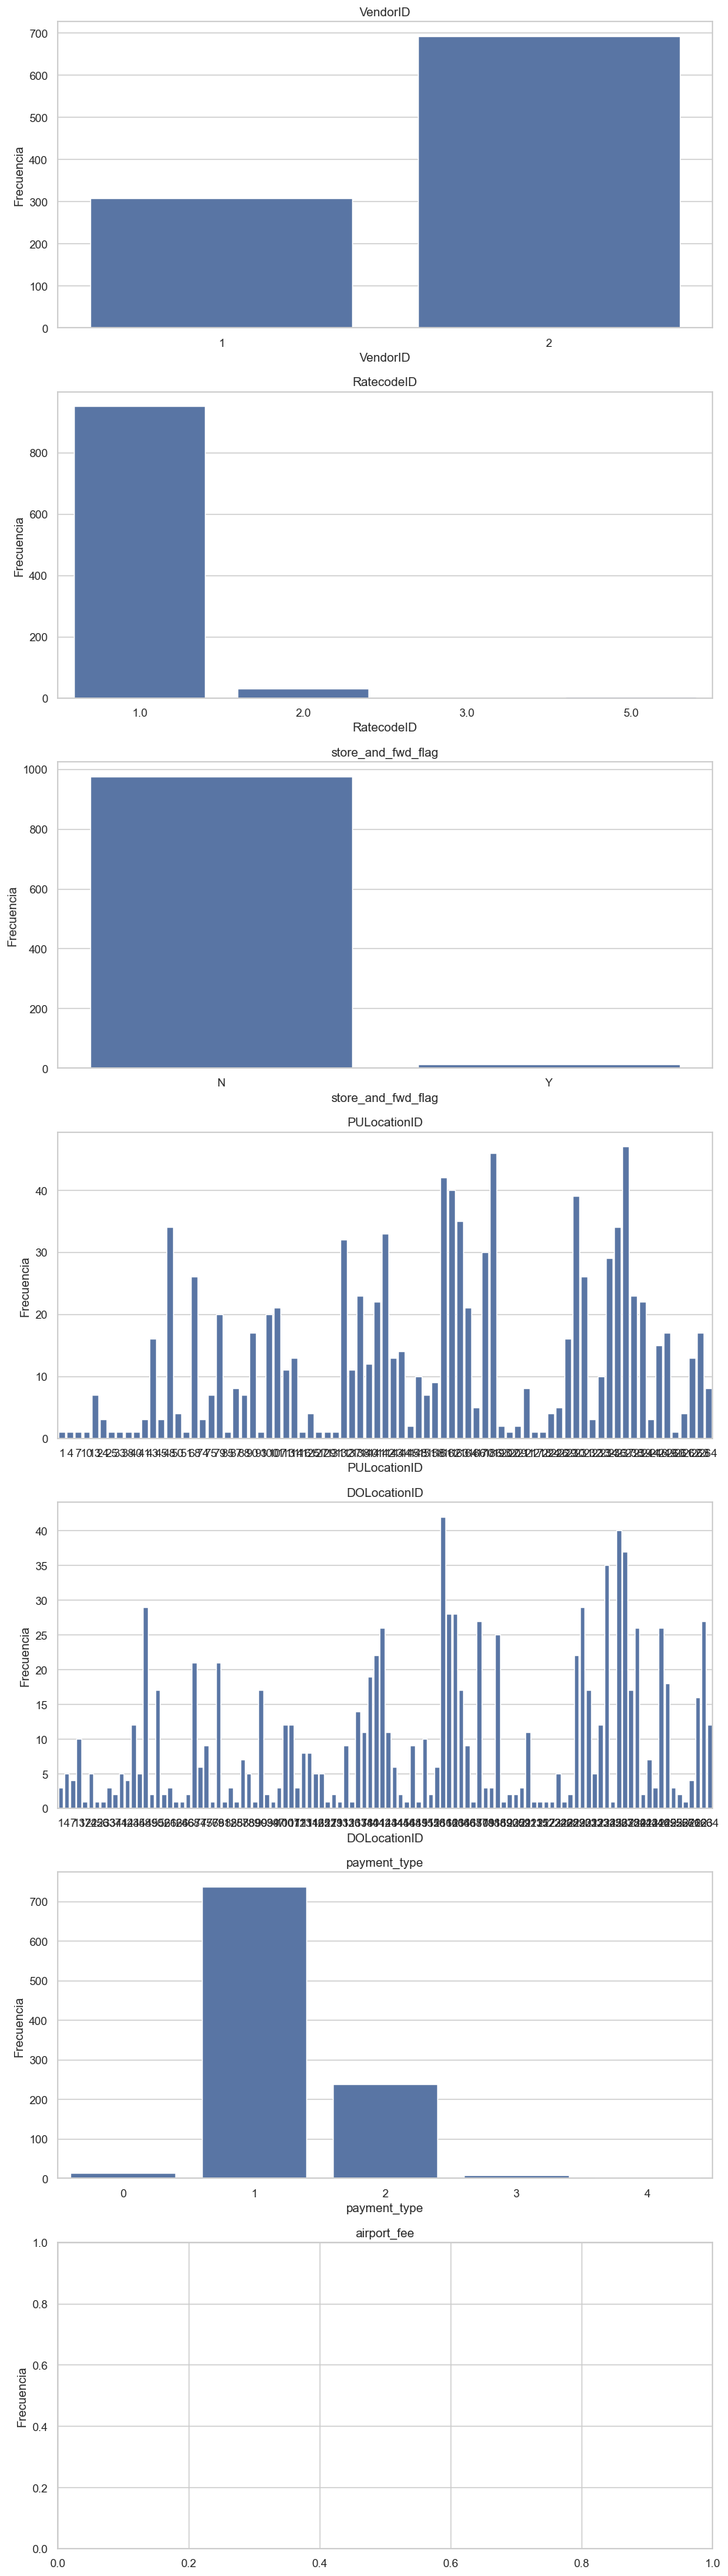

In [78]:
sampled_cat_df = raw_df[CATEGORY_FEATURES].sample(n=1000, random_state=42)

# Número de columnas
num_columns = len(sampled_cat_df.columns)

# Crear una figura con varios subgráficos
fig, axs = plt.subplots(num_columns, figsize=(10, 5 * num_columns)) 

for i, column in enumerate(sampled_cat_df.columns):
    # Conteo de los valores en cada columna
    conteo_valores = sampled_cat_df[column].value_counts()

    # Creando el gráfico de barras para cada columna
    sns.barplot(x=conteo_valores.index, y=conteo_valores.values, ax=axs[i])

    # Añadiendo títulos y etiquetas a cada subgráfico
    axs[i].set_title(column)
    axs[i].set_ylabel('Frecuencia')

# Ajustando el layout para evitar la superposición
plt.tight_layout()

# Mostrando el gráfico
plt.show()

## Correlaciones

## Conclusiones

## Separación de datos

## Final

NUMERICAL_FEATURES = [...]
CATEGORY_FEATURES = [...]

TARGET = "..."

In [79]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(raw_df, test_size=0.2, random_state=42)

In [80]:
train_df.to_csv(DATASET_PATH = 'train.csv', index=False)
test_df.to_csv(DATASET_PATH = 'test.csv', index=False)

TypeError: NDFrame.to_csv() got an unexpected keyword argument 'DATASET_PATH'